In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
from matplotlib.ticker import FuncFormatter

### Functions

In [2]:
def contains_only_digits(s):
    """
    Verifica si una cadena contiene únicamente dígitos utilizando expresiones regulares.
    
    Args:
    s (str): La cadena a evaluar.
    
    Returns:
    bool: True si la cadena contiene únicamente dígitos, False de lo contrario.
    """
    # Define el patrón de la expresión regular para buscar solo dígitos
    pattern = r'^\d+$'
    
    # Utiliza la función match() de la biblioteca re para buscar el patrón en la cadena
    # La función match() busca el patrón desde el principio de la cadena
    # Devuelve un objeto Match si el patrón coincide, None de lo contrario
    match = re.match(pattern, s)
    
    # Si match no es None, significa que el patrón coincide y la cadena contiene solo dígitos
    return match is not None

def abreviar_miles(x, pos):
    return '{:.0f}k'.format(x * 1e-3)
formatter = FuncFormatter(abreviar_miles)

def generate_graphs(df):
    fig, axes = plt.subplots(2, 4, figsize=(17, 8))
    for i, columna in enumerate(cols_hexagon_plot):
        row = i // 4
        col = i % 4
        ax = axes[row, col]
        hb = ax.hexbin(df['Likes'], df[columna], gridsize=35, bins='log', cmap='inferno')
        ax.set_title("Likes vs {}".format(columna))
        if columna != 'Care':
            ax.yaxis.set_major_formatter(formatter)
        ax.xaxis.set_major_formatter(formatter)
    cb = fig.colorbar(hb, ax=ax, label='counts')
    plt.tight_layout()
    plt.show()

### Load data

In [3]:
df = pd.read_pickle("../../data/preprocessed/stemm_lemm_stop_words.pkl")

In [4]:
df.head(1)

,Facebook Id,Post Created,Total Interactions,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Message_stpWrd,Message_clean_stpWrd,Message_clean_stemm_stpWrd,Message_clean_lemm_stpWrd
0,100069920850250,2017-12-31 23:43:00 CST,18,16,0,2,0,0,0,0,0,0,Mitigar cambio climático pies tierra. http://r...,mitigar cambio climatico pies tierra,mitig cambi climat pies tierr,mitigar cambio climatico pie tierra


In [5]:
df[['Likes','Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care']].describe()

,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care
count,87422.000000,87422.000000,87422.000000,87422.000000,87422.000000,87422.000000,87422.000000,87422.000000,87422.000000
mean,71.975098,6.757269,40.642973,5.100936,6.495482,2.713996,11.310997,5.875112,0.001190
std,417.792290,45.861177,449.233204,57.809940,66.669351,55.639030,148.447226,73.198084,0.125999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29.000000,1.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,24635.000000,4153.000000,76035.000000,6275.000000,6533.000000,9612.000000,15547.000000,7303.000000,35.000000


It seems that, **"Love", "Wow", "Haha", "Sad", "Angry", "Care"** does not have information only 25% of each interaction have data (NO ZERO).

- People does not use that button interactions!

# Total Interactions

- **¿?** `Total Interactions` = `Likes` + `Comments` + `Shares` + `Love` + `Wow` + `Haha` + `Sad` + `Angry` + `Care`

In [6]:
tot_inter_hipotesis = []
for i in df.iloc[:,2:12].iterrows():
    if contains_only_digits(i[1].values[0]):
        tot_int = int(i[1].values[0])
        sum_int = sum(i[1].values[1:])
        tot_inter_hipotesis.append(tot_int == sum_int)

In [7]:
all(tot_inter_hipotesis)

True

# Correlation between interactions

In [8]:
df.columns

Index(['Facebook Id', 'Post Created', 'Total Interactions', 'Likes',
       'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care',
       'Message_stpWrd', 'Message_clean_stpWrd', 'Message_clean_stemm_stpWrd',
       'Message_clean_lemm_stpWrd'],
      dtype='object')

In [9]:
corr_matrix = df[['Likes','Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care']].corr()

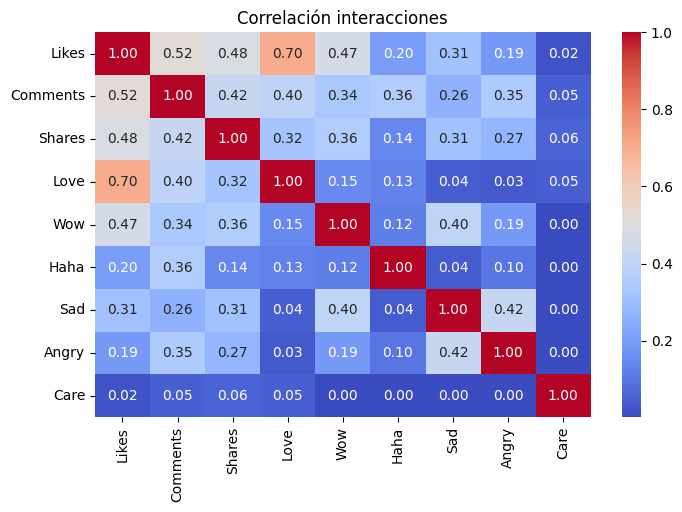

In [10]:
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación interacciones')
plt.show()

Seems that there is no correlation between variables, why?
- When does data was recopilated? When does interactions "Love", "Wow", "Haha", "Sad", "Angry", "Care" began?
- Does those interections are measure after they were created? I mean, are we measuring "Angry" when that option ever exists?

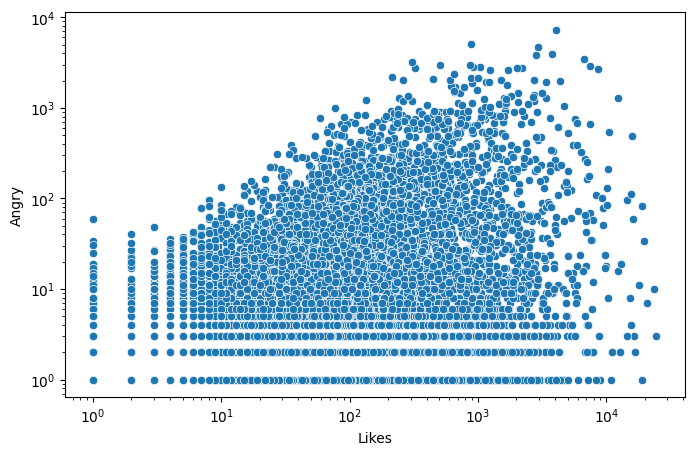

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Likes", y="Angry")
plt.yscale('log')
plt.xscale('log')
plt.show()

In [12]:
print(df['Likes'].min(), df['Likes'].max())
print(df['Angry'].min(), df['Angry'].max())

xlim = df['Likes'].min(), df['Likes'].max()
ylim = df['Angry'].min(), df['Angry'].max()

0 24635
0 7303


In [13]:
cols_hexagon_plot = ['Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care']

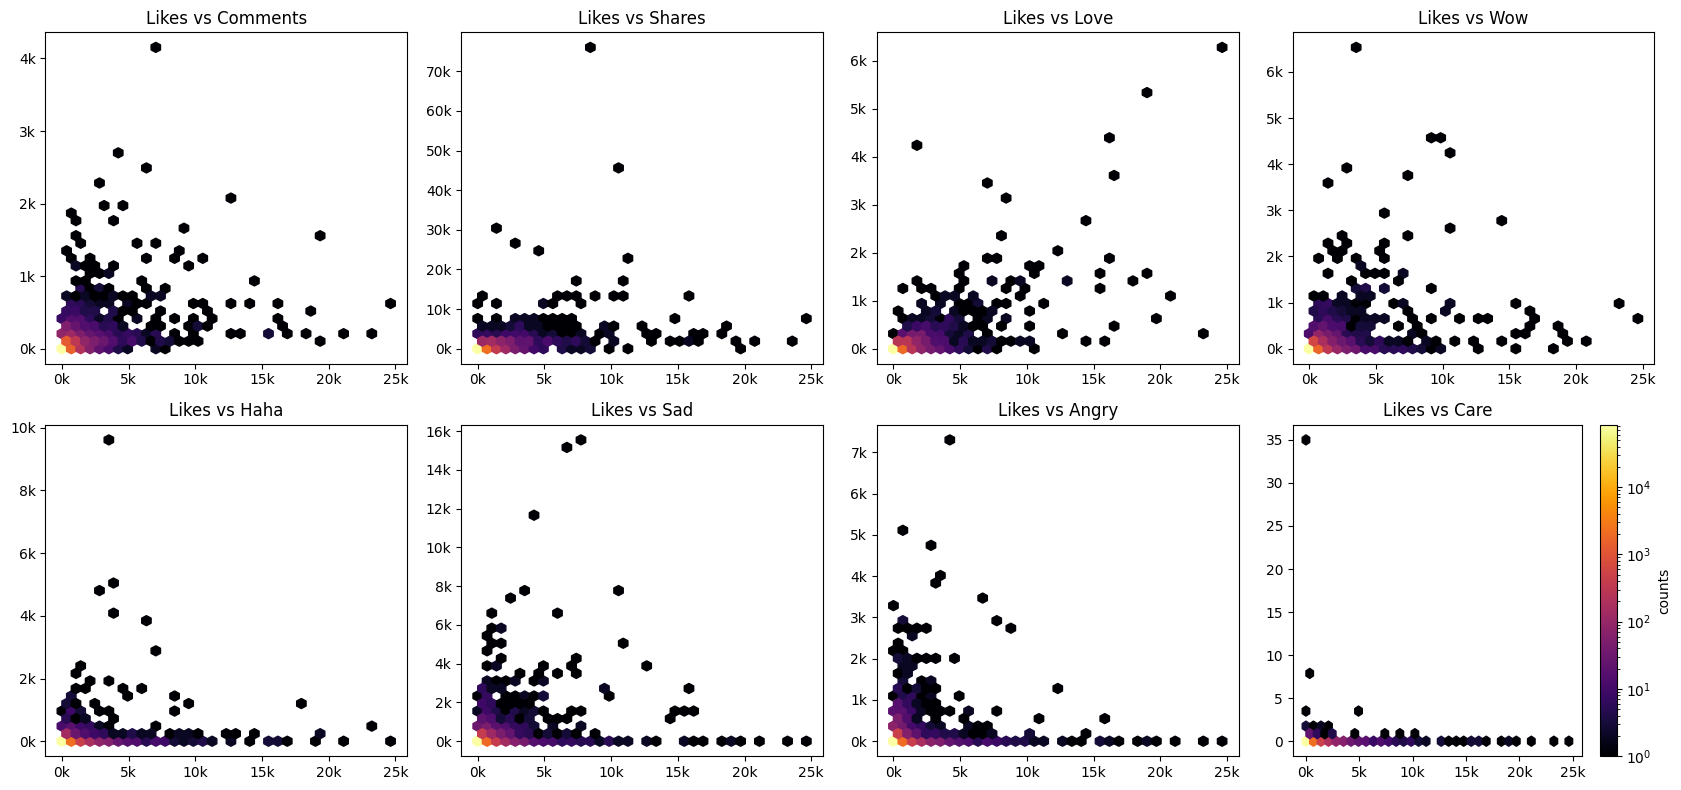

In [14]:
generate_graphs(df)

Due to, **"Love", "Wow", "Haha", "Sad", "Angry", "Care"** has minimum information I will analyze **"Likes"**

# Likes

In [15]:
cols_hist_plot = ['Likes', 'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care']

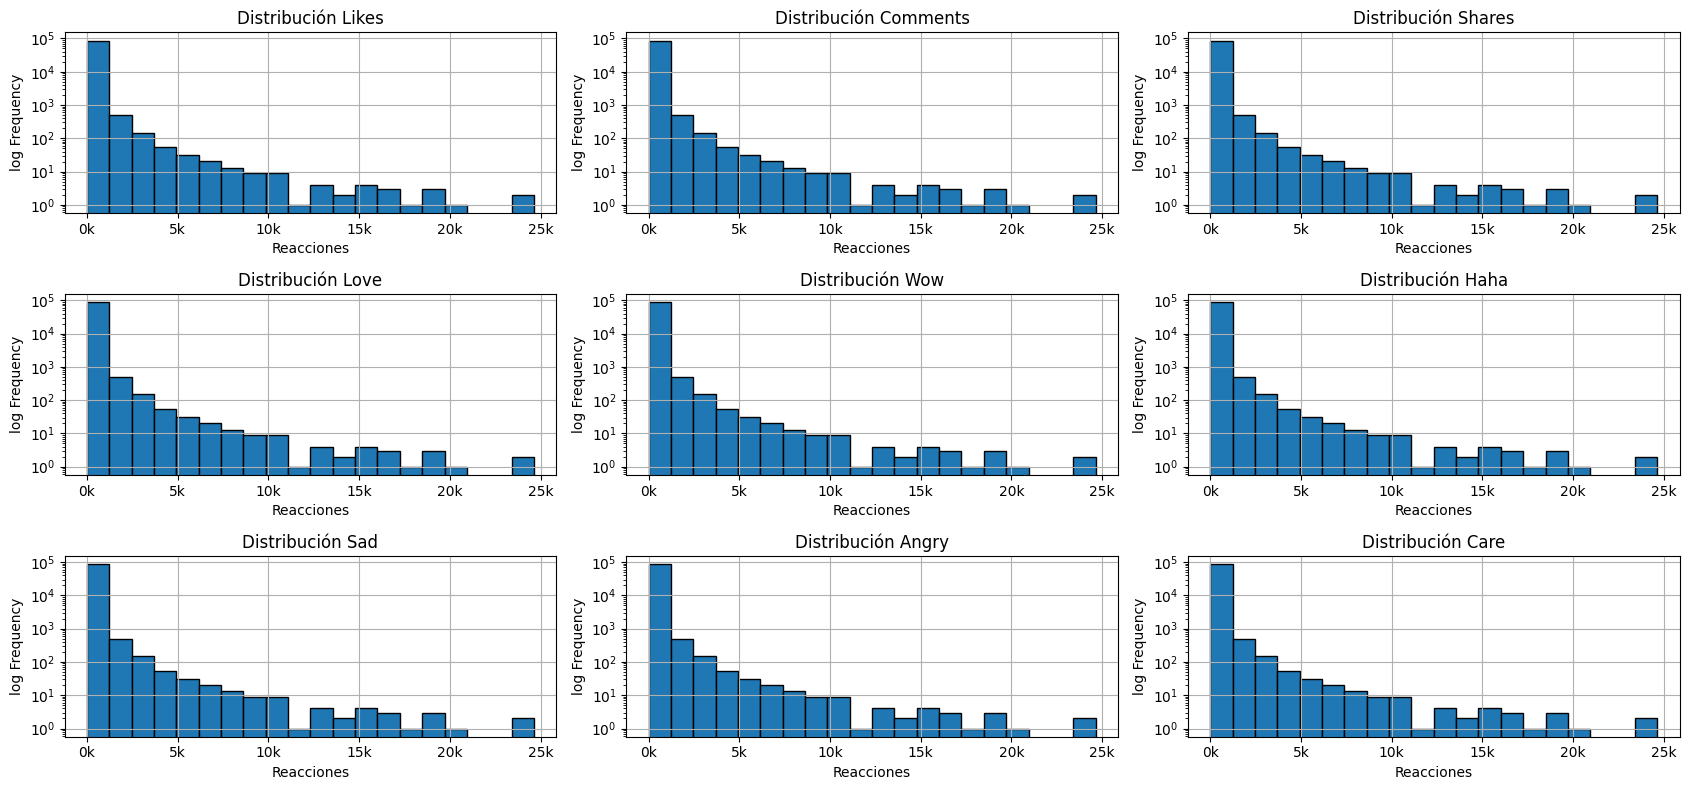

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(17, 8))
for i, columna in enumerate(cols_hist_plot):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.xaxis.set_major_formatter(formatter)
    ax.hist(df["Likes"], bins=20, edgecolor='black')
    ax.set_title(f'Distribución {columna}')
    ax.set_xlabel("Reacciones")
    ax.set_ylabel('log Frequency')
    ax.set_yscale('log')
    ax.grid(True)
plt.tight_layout()
plt.show()